### Step 1 : Reading and understanding the data

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [2]:
advertising = pd.read_csv('/Users/amritasingh/Downloads/Personal Drive/Documents/Study Material/EPGP in ML and AI/Codes/09_Linear_Regression/Simple_Linear_Regression/advertising.csv')

In [3]:
advertising.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Visualise the data

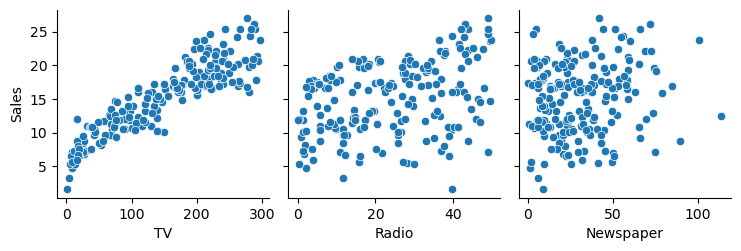

In [7]:
sns.pairplot(data=advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

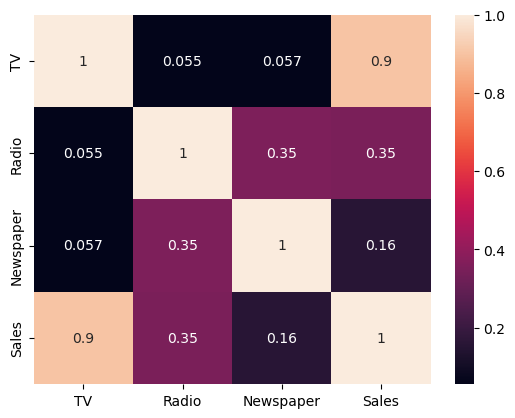

In [8]:
sns.heatmap(advertising.corr(),annot=True)
plt.show()

### Step 2: Performing Simple Linear Regression

steps:
1. create X and Y
2. create train and test sets (70-30,80-20)
3. train your model on the training sets ie to learn the coefficients
4. evaluate the model (trainig set, test set)

In [9]:
# create x and y
# by convention X is uppercase and y is lowercase
X = advertising['TV']
y = advertising['Sales']

In [10]:
#Train - Test split
X_train, X_test , y_train , y_test = train_test_split(X,y,train_size=0.70,random_state=100)

In [11]:
X_train.shape

(140,)

In [12]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [13]:
# Training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [14]:
# fitting the model
# OLS = ordinary least squares
lr = sm.OLS(y_train , X_train_sm)    # creates a linear regression object
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [15]:
# We have got the below model
# Sales = 6.94 + 0.054.TV

In [16]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.52e-52
Time:                        20:48:20   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# We looked at :
# coeff and p-value
# R-squared is 81.6% , very high
# p(F-statistic) => low, the fit is not by chance

In [ ]:
y_train_pred = lr_model.predict(X_train_sm)

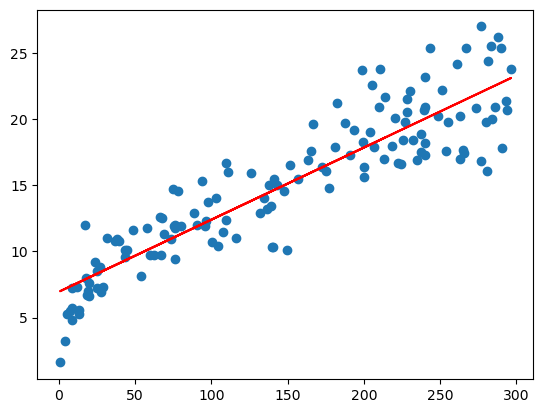

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_train_pred,'r')
plt.show()

### Step 3: Residual Analysis

In [19]:
# error = f(y_train,y_train_pred)

In [21]:
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [22]:
res = y_train - y_train_pred

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

In [23]:
# plot the residuals

In [29]:
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')

/Users/amritasingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Plot')

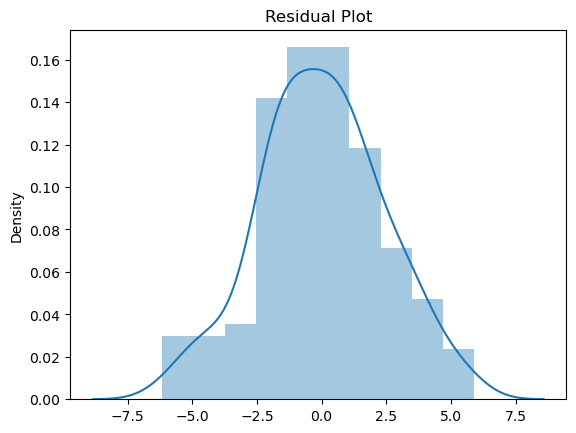

In [30]:
plt.show()

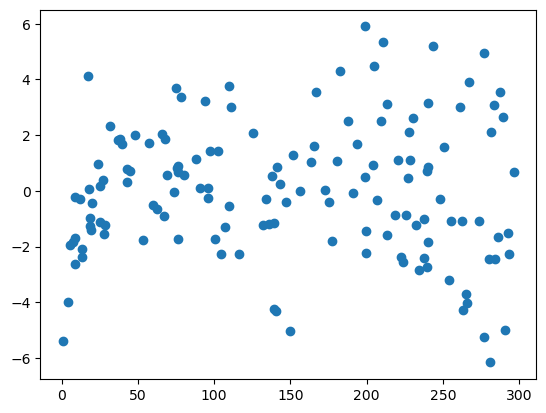

In [31]:
# look for patterns in residuals (We should not be able to identify)
plt.scatter(X_train, res)
plt.show()

### Step 4 : Prediction and Evalutaion on the test set

In [33]:
# Make predictions on the test set (y_test_pred)
# evaluate the model , r-squared , on the test

In [34]:
# Add constant on test set 
X_test_sm = sm.add_constant(X_test)

In [35]:
# Pred on test
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [38]:
# evaluate the model , r-squared , on the test

In [39]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    :math:`R^2` (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a :math:`R^2` score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    multioutput : {'raw_values', 'uniform_average', 'variance_weighted'},             array-like of shape (n_o

In [40]:
# r-squared
r2 = r2_score(y_true = y_test, y_pred=y_test_pred)
r2

0.7921031601245658

In [41]:
# mean_squared_error
mean_squared_error(y_true = y_test, y_pred=y_test_pred)

4.077556371826956

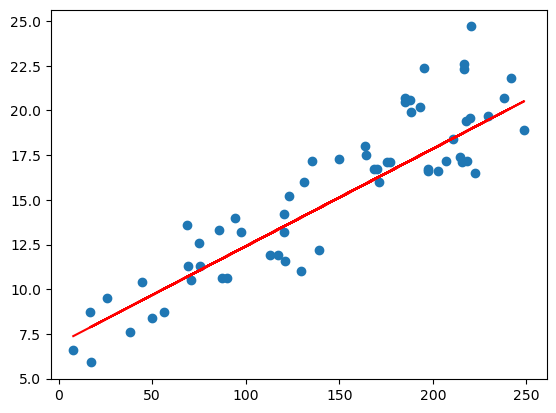

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

## LINEAR REGRESSION USING SKLEARN

In [43]:
#Train - Test split
X_train, X_test , y_train , y_test = train_test_split(X,y,train_size=0.70,random_state=100)

In [52]:
# Reshape X_train to (140,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [55]:
# steps in sklearn model building

# 1. Create an object of linear regression
lm = LinearRegression()
# 2. Fit the model
lm.fit(X_train_lm,y_train)

LinearRegression()

In [56]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [60]:
# 3. See the params , make predictions (train , test)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.94868320000136


In [63]:
# make predictions (train , test)
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [64]:
# 4. Evaluate the model(r2 etc)
# r-squared
print(r2_score(y_true = y_train, y_pred=y_train_pred))
print(r2_score(y_true = y_test, y_pred=y_test_pred))

0.8157933136480388
0.792103160124566
